<a href="https://colab.research.google.com/github/AgileDataScientist/data-analysis-bus-data/blob/main/NYCBusDelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!cp /content/drive/My Drive/DataAnalystPortfolio/DataAnalysisNYCSchoolBusDelayTime/bus.tar.gz /content/dataset
!pip install pyjanitor
!pip install jupyter-dash
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **NYC School Bus Delay Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotly and Dash imports
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash.dependencies

# Python dplyr
from janitor import clean_names

# String imports
import re

from google.colab import drive
drive.mount('/content/myDrive')

Drive already mounted at /content/myDrive; to attempt to forcibly remount, call drive.mount("/content/myDrive", force_remount=True).


## **Read Data**

In [ ]:
#bus_data = pd.read_csv('/content/myDrive/MyDrive/Data Analyst Portfolio/Data Analysis NYC School Bus Delay Time/Bus_Breakdown_and_Delays.csv')
bus_data = pd.read_csv('/content/sample_data/Bus_Breakdown_and_Delays.csv', index_col='Occurred_On', parse_dates=True)
#bus_data = pd.read_csv('/content/sample_data/Bus_Breakdown_and_Delays.csv')

# Clean up feature names
bus_data = clean_names(bus_data) 

bus_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,school_year,busbreakdown_id,run_type,bus_no,route_number,reason,schools_serviced,created_on,boro,bus_company_name,how_long_delayed,number_of_students_on_the_bus,has_contractor_notified_schools,has_contractor_notified_parents,have_you_alerted_opt,informed_on,incident_number,last_updated_on,breakdown_or_running_late,school_age_or_prek
Occurred_On,,,,,,,,,,,,,,,,,,,,
2015-11-05 08:10:00,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:12:00 AM,New Jersey,"RELIANT TRANS, INC. (B232",NaN,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
2015-11-05 08:10:00,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:12:00 AM,Manhattan,HOYT TRANSPORTATION CORP.,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2015-11-05 08:09:00,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:13:00 AM,Bronx,"G.V.C., LTD.",15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
2015-11-05 08:12:00,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:14:00 AM,Manhattan,"RELIANT TRANS, INC. (B232",15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
2015-11-05 08:13:00,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:14:00 AM,Manhattan,"RELIANT TRANS, INC. (B232",NaN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age


In [ ]:
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 529695 entries, 2015-11-05 08:10:00 to 2022-11-04 05:45:00
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   school_year                      529695 non-null  object
 1   busbreakdown_id                  529695 non-null  int64 
 2   run_type                         503672 non-null  object
 3   bus_no                           529682 non-null  object
 4   route_number                     529688 non-null  object
 5   reason                           529693 non-null  object
 6   schools_serviced                 529688 non-null  object
 7   created_on                       529695 non-null  object
 8   boro                             518481 non-null  object
 9   bus_company_name                 529695 non-null  object
 10  how_long_delayed                 476328 non-null  object
 11  number_of_students_on_the_bus    529695 non-

In [ ]:
# Missing data
bus_data.isnull().sum()

school_year                             0
busbreakdown_id                         0
run_type                            26023
bus_no                                 13
route_number                            7
reason                                  2
schools_serviced                        7
created_on                              0
boro                                11214
bus_company_name                        0
how_long_delayed                    53367
number_of_students_on_the_bus           0
has_contractor_notified_schools         0
has_contractor_notified_parents         0
have_you_alerted_opt                    0
informed_on                             0
incident_number                    518825
last_updated_on                         0
breakdown_or_running_late               0
school_age_or_prek                      0
dtype: int64

In [ ]:
# Unique values feature
bus_data.nunique()

school_year                             8
busbreakdown_id                    529695
run_type                               10
bus_no                              17413
route_number                        17109
reason                                 10
schools_serviced                    29909
created_on                         254456
boro                                   11
bus_company_name                      135
how_long_delayed                     1877
number_of_students_on_the_bus         329
has_contractor_notified_schools         2
has_contractor_notified_parents         2
have_you_alerted_opt                    2
informed_on                        254456
incident_number                      7869
last_updated_on                    189254
breakdown_or_running_late               2
school_age_or_prek                      2
dtype: int64

In [ ]:
def bar_plot(df, column, horizontal = False, sort_by_index=False):

  if sort_by_index:
    data = df[column].value_counts(ascending=False).sort_index()
  else: 
    data = df[column].value_counts(ascending = True)

  if horizontal:
    plt.barh(data.index, 
             data.values );
    plt.xlabel('Frequency Count')
  else:
    plt.bar(data.index, 
            data.values );
    plt.ylabel('Frequency Count')
  plt.title(column)
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.tight_layout()
  plt.show()

In [ ]:
bus_data.columns

Index(['school_year', 'busbreakdown_id', 'run_type', 'bus_no', 'route_number',
       'reason', 'schools_serviced', 'created_on', 'boro', 'bus_company_name',
       'how_long_delayed', 'number_of_students_on_the_bus',
       'has_contractor_notified_schools', 'has_contractor_notified_parents',
       'have_you_alerted_opt', 'informed_on', 'incident_number',
       'last_updated_on', 'breakdown_or_running_late', 'school_age_or_prek'],
      dtype='object')

## **SCHOOL YEAR**

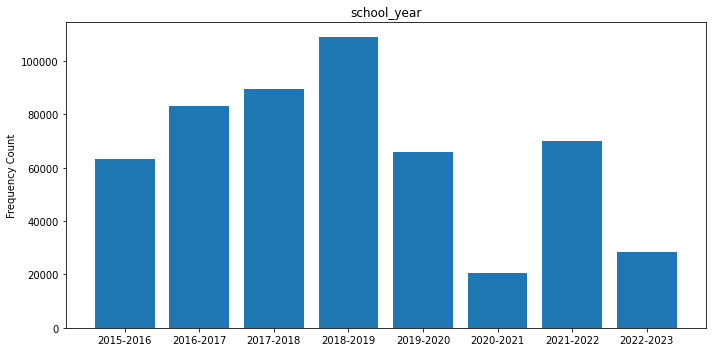

In [ ]:
# Counts for School Year
bar_plot(bus_data, 'school_year', False , True)

In [ ]:
bus_data['run_type'].value_counts(dropna=False)

Special Ed AM Run          291163
Special Ed PM Run           76069
Pre-K/EI                    60200
General Ed AM Run           58422
NaN                         26023
General Ed PM Run           14092
General Ed Field Trip        1436
Special Ed Field Trip        1436
Project Read PM Run           710
Project Read AM Run           139
Project Read Field Trip         5
Name: run_type, dtype: int64

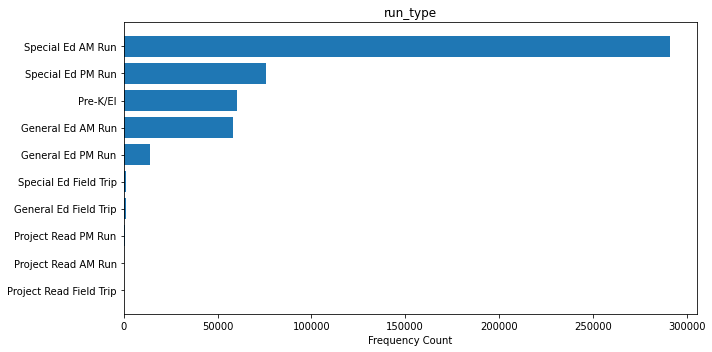

In [ ]:
# Run Type counts
bar_plot(bus_data, 'run_type', True, False)

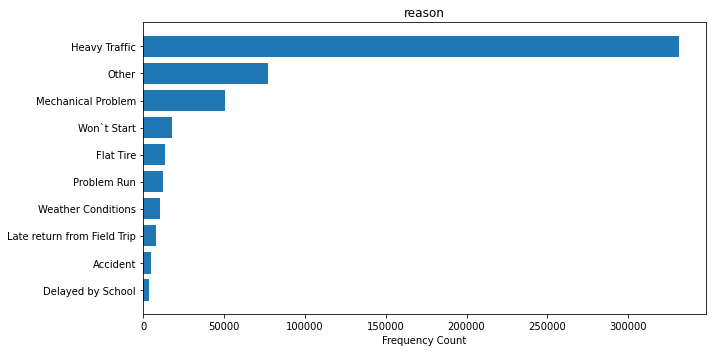

In [ ]:
# Counts of reason for lateness
bar_plot(bus_data, 'reason', True, False)

## **5 BOROUGHS**

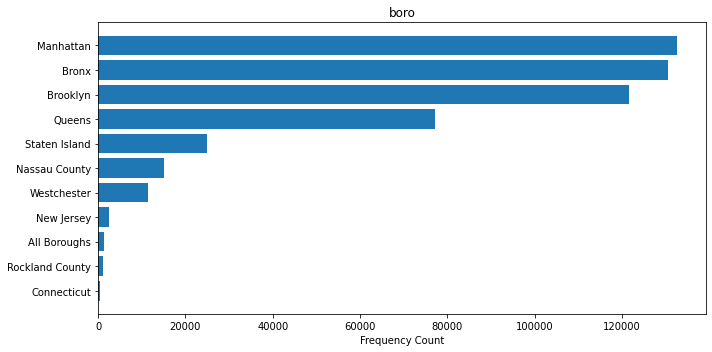

In [ ]:
# Run_type counts 
bar_plot(bus_data, 'boro', True, False)

In [ ]:
# Dictionary to map boroughs to the 5 NYC boroughs and codes all others to Outer Region
borough_map = {'Manhattan':    'Manhattan', 
               'Bronx':        'Bronx', 
               'Brooklyn':     'Brooklyn', 
               'Queens':       'Queens', 
               'Staten Island':   'Staten Island',
               'Nassau County':   'Outer Region', 
               'Westchester':     'Outer Region', 
               'New Jersey':      'Outer Region', 
               'All Boroughs':    'Outer Region',
               'Rockland County': 'Outer Region', 
               'Connecticut': 'Outer Region',
               'NaN': 'Outer Region'
               }

bus_data['borough_mapped'] = bus_data['boro'].fillna('NaN').map(borough_map)
bus_data['borough_mapped'].value_counts(dropna=False)

Manhattan        132470
Bronx            130393
Brooklyn         121660
Queens            77226
Outer Region      43094
Staten Island     24852
Name: borough_mapped, dtype: int64

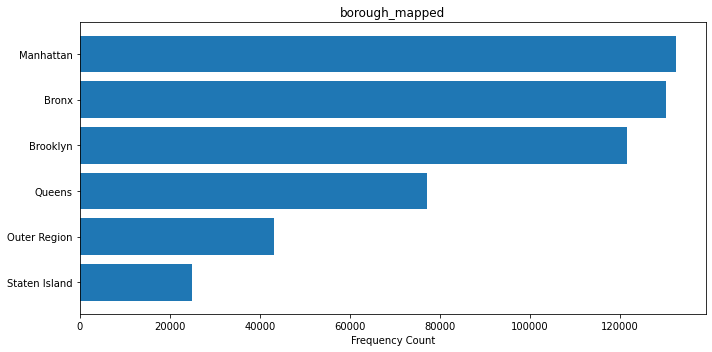

In [ ]:
bar_plot(bus_data, 'borough_mapped', True, False)

## **BUS COMPANY NAME**

In [ ]:
bus_data['bus_company_name'].str.lower().value_counts()

leesel transportation corp (b2192)     66488
pioneer transportation corp            30959
g.v.c., ltd.                           28563
boro transit, inc.                     25545
reliant transportation, inc (b2321)    23992
                                       ...  
r & c transit, inc. (b2321)                1
alina                                      1
l&m bus corp.                              1
iy                                         1
guillen rodriguez                          1
Name: bus_company_name, Length: 132, dtype: int64

In [ ]:
bus_data['bus_company_name'].str.lower().value_counts().index[0:30]

Index(['leesel transportation corp (b2192)', 'pioneer transportation corp',
       'g.v.c., ltd.', 'boro transit, inc.',
       'reliant transportation, inc (b2321)', 'van trans llc (b2192)',
       'hoyt transportation corp.', 'little richie bus service',
       'reliant trans, inc. (b232', 'pride transportation (sch age)',
       'allied transit corp.', 'snt bus inc', 'l & m bus corp.',
       'pioneer transportation co', 'leesel transp corp (b2192',
       'new dawn transit, llc (b2', 'logan bus company inc.',
       'empire charter service inc', 'leesel transp corp (b2192)',
       'nyc school bus umbrella services', 'g.v.c. ltd. (b2192)',
       'new dawn transit, llc (b2321)', 'empire state bus corp.',
       'selby transportation', 'jofaz transportation inc.',
       'reliant trans, inc. (b2321)', 'don thomas buses, inc. (b2321)',
       'quality transportation corp.', 'l & m bus corp (a)',
       'don thomas buses, inc.'],
      dtype='object')

In [ ]:
print(bus_data['bus_company_name'][0])

re.findall('[a-zA-Z0-9]+\w', bus_data['bus_company_name'][0])

RELIANT TRANS, INC. (B232


['RELIANT', 'TRANS', 'INC', 'B232']

In [ ]:
bus_data['bus_company_name'].str.lower().value_counts().index[30:60]

Index(['careful bus', 'b & f skilled inc.(b2192)', 'grandpa`s bus co., inc.',
       'little lisa bus co. inc.', 'consolidated bus transit, inc.',
       'lorinda enterprises, ltd.', 'lorinda ent. ltd.',
       'y & m transit corp (b2192)', 'first steps trans inc. (b2192)',
       'mar-can transport co. inc (b2192)', 'mar-can transport co. inc',
       'l & m bus corp. (b2192)', 'don thomas buses, inc. (b',
       'bobby`s bus co. inc.', 'happy child trans llc (b2',
       'phillip bus corp (b2192)', 'pride transportation (sch',
       'all american school bus corp.', 'first steps transp inc. (',
       'thomas buses, inc. (b2321)', 'consolidated bus trans. i',
       'phillips bus service', 'acme bus corp. (b2321)',
       'lorissa bus service inc.', 'y & m transit corp (b2192',
       'happy child trans llc (b2192)', 'all american school bus c',
       'quality transportation co', 'alina services corp.',
       'another ride inc.'],
      dtype='object')

In [ ]:
bus_data.groupby('boro')['bus_company_name'].value_counts()

boro          bus_company_name                   
All Boroughs  HOYT TRANSPORTATION CORP.              742
              VAN TRANS LLC (B2192)                  308
              BORO TRANSIT, INC.                      83
              PRIDE TRANSPORTATION (SCH AGE)          67
              RELIANT TRANSPORTATION, INC (B2321)     48
                                                    ... 
Westchester   JOFAZ TRANSPORTATION INC.                3
              PRIDE TRANSPORTATION (SCH AGE)           2
              PRIDE TRANSPORTATION (SCH                1
              RELIANT TRANSPORTATION, INC (B2321)      1
              THOMAS BUSES, INC. (B2321                1
Name: bus_company_name, Length: 473, dtype: int64

## **INCIDENCE NUMBER**

In [ ]:
bus_data['incident_number'].value_counts(dropna=False)

NaN           518825
X               1043
x                118
e                 65
90558530          33
               ...  
90267100           1
90267079           1
90267010           1
90266920           1
91222837.0         1
Name: incident_number, Length: 7870, dtype: int64

In [ ]:
bus_data['incident_number_yn'] = pd.Series(['Yes' for x in bus_data['incident_number'].fillna('No') if x != 'No'])
bus_data['incident_number_yn'].fillna('No', inplace=True)
bus_data['incident_number_yn'].value_counts()

No    529695
Name: incident_number_yn, dtype: int64

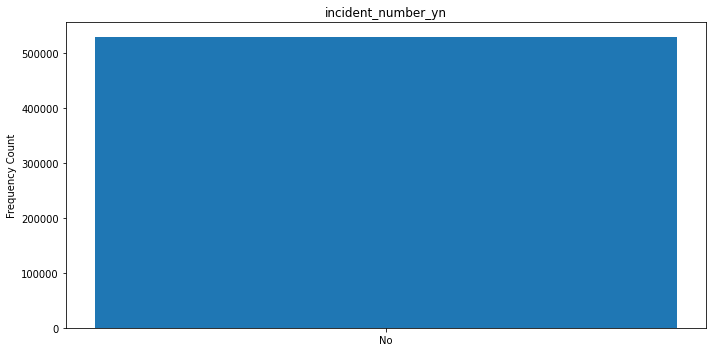

In [ ]:
bar_plot(bus_data, 'incident_number_yn', False, True)

## **SCHOOL AGE OR PRE-K**

In [ ]:
bus_data['school_age_or_prek'].value_counts(dropna=False)

School-Age    469495
Pre-K          60200
Name: school_age_or_prek, dtype: int64

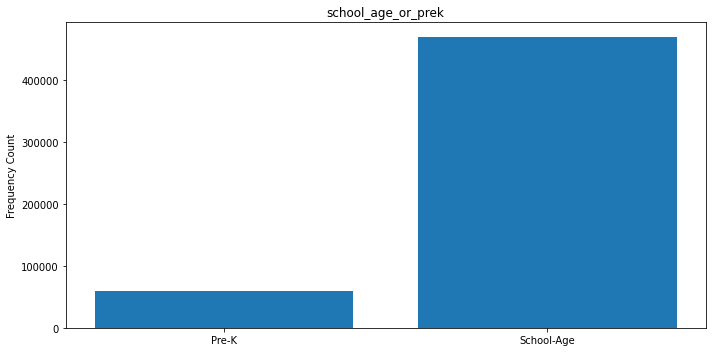

In [ ]:
bar_plot(bus_data, 'school_age_or_prek')

## **HOW LONG DELAYED**


In [ ]:
bus_data['how_long_delayed'].value_counts(dropna=False)

31-45 Min     116145
16-30 Min     107832
46-60 Min      62185
NaN            53367
0-15 Min       38306
               ...  
30min???           1
30min??            1
39 MINS            1
est. 25min         1
45 MINIUTE         1
Name: how_long_delayed, Length: 1878, dtype: int64

In [ ]:
bus_data['how_long_delayed'].astype(str)

Occurred_On
2015-11-05 08:10:00          nan
2015-11-05 08:10:00        20MNS
2015-11-05 08:09:00        15MIN
2015-11-05 08:12:00       15 MIN
2015-11-05 08:13:00          nan
                         ...    
2022-10-27 07:34:00     0-15 Min
2022-10-31 07:38:00    16-30 Min
2022-11-03 06:30:00          nan
2022-11-04 06:03:00    61-90 Min
2022-11-04 05:45:00    61-90 Min
Name: how_long_delayed, Length: 529695, dtype: object

In [ ]:
def how_long_delayed_recode(value):
  cleaned_up_value = value.replace('1:40', '100').replace('MI N',' min ').replace('mis', ' min ').replace('MN', ' min ').replace('Min', ' min ').replace('MIN', " min ").replace('minute', " min ").replace('/30mi',' 30 min ').replace('one hour', '60 min ').replace('mm','m').replace("est.", "").replace('mins', " min ").replace('min', " min ")
  return cleaned_up_value

bus_data["delayed_recoded"] = bus_data['how_long_delayed'].astype(str).apply(how_long_delayed_recode)
bus_data["delayed_recoded"].value_counts()

31-45   min          116145
16-30   min          107832
46-60   min           62185
nan                   53367
0-15   min            38306
                      ...  
25 min  30  min           1
4104                      1
11/10/16                  1
100   min  S              1
45   min  IUTE            1
Name: delayed_recoded, Length: 1656, dtype: int64

In [ ]:
bus_data['delay_interval_x'] = bus_data['delayed_recoded'].str.extract('([0-9]+-[0-9]+)', expand=False)
bus_data['delay_interval_x'].value_counts()

31-45    116145
16-30    107832
46-60     62185
0-15      38306
61-90     24017
          ...  
20-15         1
5-1           1
10-18         1
20-20         1
15-10         1
Name: delay_interval_x, Length: 76, dtype: int64

In [ ]:
bus_data['delay_interval'] = bus_data['how_long_delayed'].str.extract('([0-9]+-[0-9]+)', expand=False)
bus_data['delay_interval'].value_counts().index

Index(['31-45', '16-30', '46-60', '0-15', '61-90', '20-30', '15-20', '10-15',
       '25-30', '20-25', '10-20', '25-35', '5-10', '30-40', '30-45', '30-60',
       '35-40', '30-35', '40-45', '35-45', '10-12', '45-60', '15-30', '15-25',
       '45-50', '45-1', '7-10', '5-7', '40-50', '20-40', '8-10', '20-32',
       '20-35', '60-90', '40-60', '5-15', '25-40', '30-50', '5-8', '50-1',
       '40-55', '50-60', '40-1', '12-18', '10-30', '13-15', '2-30', '10-11',
       '20-225', '18-25', '25-300', '60-120', '25-20', '10-112', '115-20',
       '15-320', '6-7', '20-28', '40-5', '45-55', '52-30', '25-45', '12-15',
       '15-250', '12-20', '10-14', '7-8', '30-75', '30-70', '10-40', '15-15',
       '20-15', '5-1', '10-18', '20-20', '15-10'],
      dtype='object')

In [ ]:
how_long_delayed_interval = {'31-45': '< 45', '16-30': '< 30', '46-60': '< 60', '0-15' : '< 15', '61-90': '< 90', '20-30': '< 30', 
                             '15-20': '< 20', '10-15': '< 15', '25-30': '< 30', '20-25': '< 25', '10-20': '< 20', '25-35': '< 35', 
       '5-10': '< 10', '30-40': '< 40', '30-45': '< 45', '30-60': '< 60',
       '35-40': '< 40', '30-35': '< 35', '40-45': '< 45', '35-45': '< 45', '10-12': '< 15', '45-60': '< 60', '15-30': '< 30', '15-25': '< 25',
       '45-50': '< 50', '45-1': '< 45', '7-10': '< 10', '5-7': '< 10', '40-50': '< 50', '20-40': '< 40', '8-10': '< 10', '20-32': '< 35',
       '20-35': '< 35', '60-90': '< 90', '40-60': '< 60', '5-15': '< 15', '25-40': '< 40', '30-50': '< 50', '5-8': '< 10', '50-1': '< 50',
       '40-55': '< 55', '50-60': '< 60', '40-1': '< 40', '12-18': '< 20', '10-30': '< 30', '13-15': '< 15', '2-30': '< 30', '10-11': '< 15',
       '20-225': '< 25', '18-25': '< 25', '25-300': '< 30', '60-120': '< 120', '25-20': '< 25', '10-112': '< 15', '115-20': '< 20',
       '15-320': '< 35', '6-7': '< 10', '20-28': '< 30', '40-5': '< 40', '45-55': '< 55', '52-30': '< 55', '25-45': '< 45', '12-15': '< 15',
       '15-250': '< 25', '12-20': '< 20', '10-14': '< 15', '7-8': '< 10', '30-75': '< 75', '30-70': '< 70', '10-40': '< 40', '15-15': '< 15',
       '20-15': '< 20', '5-1': '< 10', '10-18': '< 20', '20-20': '< 20', '15-10': '< 15'}

In [ ]:
how_long_delayed_interval = {'31-45':[31, 45], '16-30':[16, 30], '46-60':[46, 60], '0-15':[0, 15],   '61-90':[61, 90], '20-30':[20, 30], 
                             '15-20':[15, 20], '10-15':[10, 15], '25-30':[25, 30], '20-25':[20, 25], '10-20':[10, 20], '25-35':[25, 35], 
       '5-10':[5, 10], '30-40':[30, 40], '30-45':[30, 45], '30-60':[30, 60],
       '35-40':[35, 40], '30-35':[30, 35], '40-45':[40, 45], '35-45':[35, 45], '10-12':[10, 12], '45-60':[45, 60], 
       '15-30':[15, 30], '15-25':[15, 25], '45-50':[45, 50], '45-1':[1, 45], '7-10':[7, 10], '5-7':[5, 7], '40-50':[40, 50], 
       '20-40':[20, 40], '8-10':[8, 10], '20-32':[20, 32], '20-35':[20, 35], '60-90':[60, 90], '40-60':[40, 60], 
       '5-15':[5, 15], '25-40':[25, 40], '30-50':[30, 50], '5-8':[5, 8], '50-1':[1, 50],
       '40-55':[40, 55], '50-60':[50, 60], '40-1':[1, 40], '12-18':[12, 18], '10-30':[10, 30], '13-15':[13, 15], '2-30':[2, 30], '10-11':[10, 11],
       '20-225':[30, 225], '18-25':[18, 25], '25-300':[25, 300], '60-120':[60, 120], '25-20':[20, 25], '10-112':[10, 112], '115-20':[20, 115],
       '15-320':[15, 320], '6-7':[6, 7], '20-28':[20, 28], '40-5':[5, 40], '45-55':[45, 55], '52-30':[30, 52], '25-45':[25, 45], '12-15':[12, 15],
       '15-250':[15, 250], '12-20':[12, 20], '10-14':[10, 14], '7-8':[7, 8], '30-75':[30, 75], '30-70':[30, 70], '10-40':[10, 40], '15-15':[15, 15],
       '20-15':[15, 20], '5-1':[1, 5], '10-18':[10, 18], '20-20':[20, 20], '15-10':[10, 15]}

In [ ]:
keys = ['31-45', '16-30', '46-60', '0-15', '61-90', '20-30', '15-20', '10-15',
       '25-30', '20-25', '10-20', '25-35', '5-10', '30-40', '30-45', '30-60',
       '35-40', '30-35', '40-45', '35-45', '10-12', '45-60', '15-30', '15-25',
       '45-50', '45-1', '7-10', '5-7', '40-50', '20-40', '8-10', '20-32',
       '20-35', '60-90', '40-60', '5-15', '25-40', '30-50', '5-8', '50-1',
       '40-55', '50-60', '40-1', '12-18', '10-30', '13-15', '2-30', '10-11',
       '20-225', '18-25', '25-300', '60-120', '25-20', '10-112', '115-20',
       '15-320', '6-7', '20-28', '40-5', '45-55', '52-30', '25-45', '12-15',
       '15-250', '12-20', '10-14', '7-8', '30-75', '30-70', '10-40', '15-15',
       '20-15', '5-1', '10-18', '20-20', '15-10']

bus_data['delay_interval_mapped'] = bus_data['delay_interval'].map(how_long_delayed_interval)
#bus_data['delay_interval_mapped'].value_counts(dropna=False)
def delayed_time_interval(value):
    print(value)
    #value1 = value[0]
    #value2 = value[1]
    #print(value1,' ',value2)
    #print(value.replace('-',' ').split(' '))
    #return min(value.replace('-',' ').split(' ')[0], value.replace('-',' ').split(' ')[1])
    #, max(value.replace('-',' ').split(' ')[0], value.replace('-',' ').split(' ')[1]))

#bus_data['delay_interval_mapped'].apply(delayed_time_interval)


In [ ]:
def min_time_delayed(statement):
  if statement != '':
    value = re.findall('\d+', str(statement))
    value.sort()
    value.reverse()
    if len(value) > 0:
      return  value.pop()

def max_time_delayed(statement):
  if statement != '':
    value = re.findall('\d+', str(statement))
    value.sort()
    if len(value) > 0:
      return  value.pop()

bus_data['min_delay_time_minutes'] = bus_data['how_long_delayed'].apply(min_time_delayed)
bus_data['max_delay_time_minutes'] = bus_data['how_long_delayed'].apply(max_time_delayed)
#bus_data['min_delay_time_minutes'].value_counts(dropna=False)
#bus_data['max_delay_time_minutes'].value_counts(dropna=False)
for i in range(50, 60):
  print(bus_data['min_delay_time_minutes'][i], bus_data['max_delay_time_minutes'][i])

None None
None None
20 20
10 10
20 20
None None
20 20
30 30
30 40
15 15


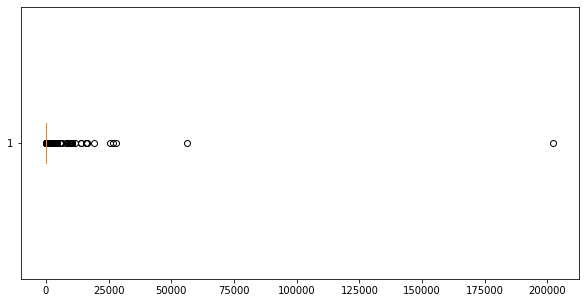

In [ ]:
def get_time(df):
  #print(df.min_delay_time_minutes, df.max_delay_time_minutes)
  if (df['min_delay_time_minutes'] is not None) and  (df['max_delay_time_minutes'] is not None):
    #print(df['min_delay_time_minutes'], df['max_delay_time_minutes'])
    upper = int(df['max_delay_time_minutes'])
    lower = int(df['min_delay_time_minutes'])
    if upper != lower:
      #print(abs( upper - lower),'\n')
      return abs( upper - lower)
    else:
      #print(lower,'\n')
      return lower 
  elif (df['min_delay_time_minutes'] is None) and (df['max_delay_time_minutes'] is None):
    #print(df.min_delay_time_minutes, df.max_delay_time_minutes,'\n')
    return 0
  elif (df['min_delay_time_minutes'] is None) and (df['max_delay_time_minutes'] is not None):
    #print(df.min_delay_time_minutes, df.max_delay_time_minutes,'\n')
    return df['max_delay_time_minutes'] - 0
  elif (df['min_delay_time_minutes'] is not None) and (df['max_delay_time_minutes'] is None):
    #print(df.min_delay_time_minutes, df.max_delay_time_minutes,'\n')
    return df['min_delay_time_minutes'] - 0
  
bus_data['delayed_minutes'] = bus_data.apply(get_time, axis=1)
plt.boxplot(bus_data['delayed_minutes'], vert=0);

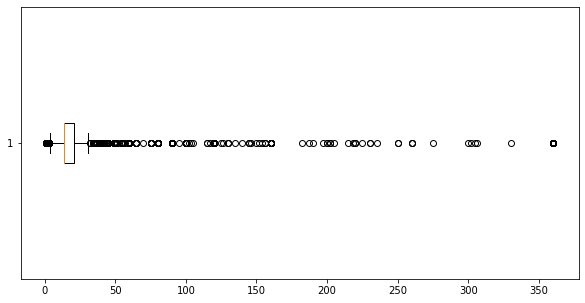

In [ ]:
'''
def cap_off_delay(statement):
  if 0 < statement < 360:
    return statement
  return 360
'''
def cap_off_delay(statement, time_in_minutes):
  if 0 < statement < time_in_minutes:
    return statement
  return time_in_minutes

bus_data['max_cap_delay'] = bus_data['delayed_minutes'].apply(lambda x: cap_off_delay(x, 360))
plt.boxplot(bus_data['max_cap_delay'], vert=0);
#bus_data['max_cap_delay'].describe().T

In [ ]:
def get_max_delay_yn(value):
  if 0 < value <= 30:
    return "<= 30"
  elif value > 30:
    return "> 30"
  else:
    return "Not specified"

bus_data['max_cap_delay'].apply(get_max_delay_yn).value_counts(dropna=False)

<= 30    457197
> 30      72498
Name: max_cap_delay, dtype: int64

In [ ]:
# PyJanitor documentation
# https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.case_when

'''
bus_data.case_when(
    (bus_data.max_cap_delay > 0) & (bus_data.max_cap_delay <=30), "<= 30 minutes",
    (bus_data.max_cap_delay >30) & (bus_data.max_cap_delay <=360), "> 30 minutes",
    default = bus_data.max_cap_delay,
    column_name = "value",
)
'''

'\nbus_data.case_when(\n    (bus_data.max_cap_delay > 0) & (bus_data.max_cap_delay <=30), "<= 30 minutes",\n    (bus_data.max_cap_delay >30) & (bus_data.max_cap_delay <=360), "> 30 minutes",\n    default = bus_data.max_cap_delay,\n    column_name = "value",\n)\n'

## **TIMESTAMP DATA**

Cleaned-up the timestamp data. Made the occurred_on the index column. Another date column is created_on.

In [ ]:
# Print 5 rows of time data
#bus_data['informed_on'][0:5]

Occurred_On
2015-11-05 08:10:00    11/05/2015 08:12:00 AM
2015-11-05 08:10:00    11/05/2015 08:12:00 AM
2015-11-05 08:09:00    11/05/2015 08:13:00 AM
2015-11-05 08:12:00    11/05/2015 08:14:00 AM
2015-11-05 08:13:00    11/05/2015 08:14:00 AM
Name: informed_on, dtype: object

In [ ]:
value = datetime.datetime.strptime(bus_data['informed_on'][0], '%m/%d/%Y %H:%M:%S %p')
datetime.datetime.strftime(value, '%m/%d/%Y %H:%M:%S %p')

'11/05/2015 08:12:00 AM'

In [ ]:
import datetime

def convert_time(date_time):
  return datetime.datetime.strptime(date_time, '%m/%d/%Y %H:%M:%S %p')

bus_data['informed_on_dt'] = bus_data['informed_on'].apply(convert_time)

In [ ]:
bus_data['informed_on_dt'][0].month, bus_data['informed_on_dt'][0].day, bus_data['informed_on_dt'][0].year

(11, 5, 2015)

In [ ]:
bus_data.groupby('breakdown_or_running_late')['has_contractor_notified_schools'].value_counts(dropna=False)

breakdown_or_running_late  has_contractor_notified_schools
Breakdown                  Yes                                 41599
                           No                                   7217
Running Late               Yes                                420466
                           No                                  60413
Name: has_contractor_notified_schools, dtype: int64

In [ ]:
# Explore reason
bus_data.groupby('reason')['breakdown_or_running_late'].value_counts(dropna=False)

reason                       breakdown_or_running_late
Accident                     Running Late                   4340
                             Breakdown                       461
Delayed by School            Running Late                   3791
                             Breakdown                        15
Flat Tire                    Running Late                   6921
                             Breakdown                      6434
Heavy Traffic                Running Late                 330624
                             Breakdown                       659
Late return from Field Trip  Running Late                   8020
                             Breakdown                        49
Mechanical Problem           Running Late                  25938
                             Breakdown                     24769
Other                        Running Late                  71646
                             Breakdown                      5364
Problem Run                  Runnin

In [ ]:
bus_data.groupby('reason')['has_contractor_notified_schools'].value_counts(dropna=False)

reason                       has_contractor_notified_schools
Accident                     Yes                                  4190
                             No                                    611
Delayed by School            Yes                                  3366
                             No                                    440
Flat Tire                    Yes                                 11585
                             No                                   1770
Heavy Traffic                Yes                                292851
                             No                                  38432
Late return from Field Trip  Yes                                  7059
                             No                                   1010
Mechanical Problem           Yes                                 41796
                             No                                   8911
Other                        Yes                                 64944
                

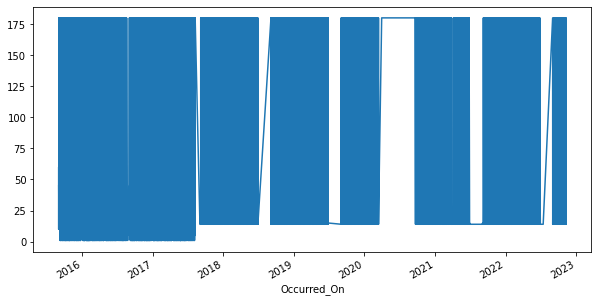

In [ ]:
bus_data['max_cap_delay'].astype('float64').plot();

In [ ]:
bus_data.groupby('reason')['max_cap_delay'].describe().T

reason,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Other,Problem Run,Weather Conditions,Won`t Start
count,4801.000000,3806.000000,13355.000000,331283.000000,8069.000000,50707.000000,77010.000000,12573.000000,10174.000000,17915.000000
mean,90.692772,26.227798,272.973718,22.065126,35.137564,279.315440,60.949565,23.483417,34.461274,338.905554
std,178.121178,74.163855,260.128145,54.219278,90.480002,260.873231,143.768146,54.831051,86.028915,253.195276
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,15.000000
50%,14.000000,14.000000,45.000000,14.000000,14.000000,540.000000,14.000000,14.000000,15.000000,540.000000
75%,30.000000,15.000000,540.000000,15.000000,29.000000,540.000000,29.000000,20.000000,29.000000,540.000000
max,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000


In [ ]:
def cap_off_delay(statement, time_in_minutes):
  if 0 < statement < time_in_minutes:
    #print(time_in_minutes)
    #print(statement)
    return statement
  return time_in_minutes


bus_data['max_cap_delay'] = bus_data['delayed_minutes'].apply(lambda x: cap_off_delay(x, 180))
bus_data.groupby('reason')['max_cap_delay'].describe().T

reason,Accident,Delayed by School,Flat Tire,Heavy Traffic,Late return from Field Trip,Mechanical Problem,Other,Problem Run,Weather Conditions,Won`t Start
count,4801.000000,3806.000000,13355.000000,331283.000000,8069.000000,50707.000000,77010.000000,12573.000000,10174.000000,17915.000000
mean,41.988752,18.944561,97.789891,18.226857,24.083653,99.283097,31.326126,19.560725,24.527128,118.223444
std,55.912810,24.167252,80.523874,18.214210,29.739821,81.200466,45.553759,18.728159,28.915942,78.062041
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,15.000000
50%,14.000000,14.000000,45.000000,14.000000,14.000000,180.000000,14.000000,14.000000,15.000000,180.000000
75%,30.000000,15.000000,180.000000,15.000000,29.000000,180.000000,29.000000,20.000000,29.000000,180.000000
max,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
